In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [3]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [4]:
noeun_gdf = gdf[gdf['ADM_CD']=='25040590']

In [5]:
noeun_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-5-1c91f67d3940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noeun_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [7]:
noeun_gdf['집계구번호'] = noeun_gdf['집계구번호'].astype(int)
noeun_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 45 entries, 4 to 251
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  45 non-null     object  
 1   ADM_CD     45 non-null     object  
 2   집계구번호      45 non-null     int64   
 3   geometry   45 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.8+ KB


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
noeun_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/노은동_인구수.xlsx')
noeun_df

,순위,항목,집계구번호,값,비율(%)
0,1,노은1동_1,25040590050201,775,3.8
1,2,노은1동_2,25040590040401,710,3.4
2,3,노은1동_3,25040590010102,617,3.0
3,4,노은1동_4,25040590040301,594,2.9
4,5,노은1동_5,25040590020003,584,2.8
5,6,노은1동_6,25040590010001,579,2.8
6,7,노은1동_7,25040590070301,575,2.8
7,8,노은1동_8,25040590070201,574,2.8
8,9,노은1동_9,25040590020002,571,2.8
9,10,노은1동_10,25040590070205,566,2.7


In [9]:
# prompt: sdp_df의 집계구번호 기준 오름차순 정렬

noeun_df = noeun_df.sort_values('집계구번호')
noeun_df

,순위,항목,집계구번호,값,비율(%)
5,6,노은1동_6,25040590010001,579,2.8
13,14,노은1동_14,25040590010002,525,2.5
18,19,노은1동_19,25040590010101,495,2.4
2,3,노은1동_3,25040590010102,617,3.0
26,27,노은1동_27,25040590010103,456,2.2
29,30,노은1동_30,25040590010104,440,2.1
36,37,노은1동_37,25040590010105,398,1.9
39,40,노은1동_40,25040590010201,311,1.5
23,24,노은1동_24,25040590020001,462,2.2
8,9,노은1동_9,25040590020002,571,2.8


In [10]:
# prompt: sangdae_gdf의 집계구번호를 기준으로 오름차순 정렬

noeun_gdf = noeun_gdf.sort_values('집계구번호')
noeun_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
212,20230701,25040590,25040590010001,"POLYGON ((127.32258 36.37612, 127.32267 36.375..."
216,20230701,25040590,25040590010002,"POLYGON ((127.31917 36.37610, 127.31923 36.376..."
220,20230701,25040590,25040590010101,"POLYGON ((127.32271 36.37261, 127.32229 36.372..."
217,20230701,25040590,25040590010102,"POLYGON ((127.32164 36.37260, 127.32229 36.372..."
221,20230701,25040590,25040590010103,"POLYGON ((127.32106 36.37321, 127.32061 36.373..."
219,20230701,25040590,25040590010104,"POLYGON ((127.32106 36.37260, 127.32061 36.372..."
218,20230701,25040590,25040590010105,"POLYGON ((127.32164 36.37364, 127.32061 36.373..."
222,20230701,25040590,25040590010201,"POLYGON ((127.31878 36.37283, 127.31890 36.372..."
227,20230701,25040590,25040590020001,"POLYGON ((127.31787 36.36859, 127.31787 36.368..."
223,20230701,25040590,25040590020002,"POLYGON ((127.31729 36.36874, 127.31729 36.368..."


In [11]:
# prompt: sangdae_gdf에 sdp_df의 '값'과 '비율(%)'열을 추가

noeun_new_gdf = noeun_gdf.merge(noeun_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
noeun_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040590,25040590010001,"POLYGON ((127.32258 36.37612, 127.32267 36.375...",579.0,2.8
1,20230701,25040590,25040590010002,"POLYGON ((127.31917 36.37610, 127.31923 36.376...",525.0,2.5
2,20230701,25040590,25040590010101,"POLYGON ((127.32271 36.37261, 127.32229 36.372...",495.0,2.4
3,20230701,25040590,25040590010102,"POLYGON ((127.32164 36.37260, 127.32229 36.372...",617.0,3.0
4,20230701,25040590,25040590010103,"POLYGON ((127.32106 36.37321, 127.32061 36.373...",456.0,2.2
5,20230701,25040590,25040590010104,"POLYGON ((127.32106 36.37260, 127.32061 36.372...",440.0,2.1
6,20230701,25040590,25040590010105,"POLYGON ((127.32164 36.37364, 127.32061 36.373...",398.0,1.9
7,20230701,25040590,25040590010201,"POLYGON ((127.31878 36.37283, 127.31890 36.372...",311.0,1.5
8,20230701,25040590,25040590020001,"POLYGON ((127.31787 36.36859, 127.31787 36.368...",462.0,2.2
9,20230701,25040590,25040590020002,"POLYGON ((127.31729 36.36874, 127.31729 36.368...",571.0,2.8


In [12]:
# prompt: sangdae_new_gdf['값']에 0.93을 곱해줘

noeun_new_gdf['일별쓰레기배출량'] = noeun_new_gdf['값'] * 0.93
noeun_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040590,25040590010001,"POLYGON ((127.32258 36.37612, 127.32267 36.375...",579.0,2.8,538.47
1,20230701,25040590,25040590010002,"POLYGON ((127.31917 36.37610, 127.31923 36.376...",525.0,2.5,488.25
2,20230701,25040590,25040590010101,"POLYGON ((127.32271 36.37261, 127.32229 36.372...",495.0,2.4,460.35
3,20230701,25040590,25040590010102,"POLYGON ((127.32164 36.37260, 127.32229 36.372...",617.0,3.0,573.81
4,20230701,25040590,25040590010103,"POLYGON ((127.32106 36.37321, 127.32061 36.373...",456.0,2.2,424.08
5,20230701,25040590,25040590010104,"POLYGON ((127.32106 36.37260, 127.32061 36.372...",440.0,2.1,409.20
6,20230701,25040590,25040590010105,"POLYGON ((127.32164 36.37364, 127.32061 36.373...",398.0,1.9,370.14
7,20230701,25040590,25040590010201,"POLYGON ((127.31878 36.37283, 127.31890 36.372...",311.0,1.5,289.23
8,20230701,25040590,25040590020001,"POLYGON ((127.31787 36.36859, 127.31787 36.368...",462.0,2.2,429.66
9,20230701,25040590,25040590020002,"POLYGON ((127.31729 36.36874, 127.31729 36.368...",571.0,2.8,531.03


In [14]:
noeun_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
noeun_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040590,25040590010001,"POLYGON ((127.32258 36.37612, 127.32267 36.375...",579.0,2.8,538.47
1,20230701,25040590,25040590010002,"POLYGON ((127.31917 36.37610, 127.31923 36.376...",525.0,2.5,488.25
2,20230701,25040590,25040590010101,"POLYGON ((127.32271 36.37261, 127.32229 36.372...",495.0,2.4,460.35
3,20230701,25040590,25040590010102,"POLYGON ((127.32164 36.37260, 127.32229 36.372...",617.0,3.0,573.81
4,20230701,25040590,25040590010103,"POLYGON ((127.32106 36.37321, 127.32061 36.373...",456.0,2.2,424.08
5,20230701,25040590,25040590010104,"POLYGON ((127.32106 36.37260, 127.32061 36.372...",440.0,2.1,409.20
6,20230701,25040590,25040590010105,"POLYGON ((127.32164 36.37364, 127.32061 36.373...",398.0,1.9,370.14
7,20230701,25040590,25040590010201,"POLYGON ((127.31878 36.37283, 127.31890 36.372...",311.0,1.5,289.23
8,20230701,25040590,25040590020001,"POLYGON ((127.31787 36.36859, 127.31787 36.368...",462.0,2.2,429.66
9,20230701,25040590,25040590020002,"POLYGON ((127.31729 36.36874, 127.31729 36.368...",571.0,2.8,531.03


In [15]:
# prompt: 집계구번호가 50001
# 50301
# 50201
# 10002
# 10201
# 10001
# 10105
# 10103
# 10104
# 10101
# 10102
# 60001
# 인 행 삭제

# 삭제할 집계구번호 목록
target_codes = [25040590050001, 25040590050301, 25040590050201, 25040590010002, 25040590010201, 25040590010001, 25040590010105, 25040590010103, 25040590010104, 25040590010101, 25040590010102, 25040590060001]

# 해당 집계구번호를 가진 행 삭제
noeun_filter_gdf = noeun_new_gdf[~noeun_new_gdf['집계구번호'].isin(target_codes)]
noeun_filter_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
8,20230701,25040590,25040590020001,"POLYGON ((127.31787 36.36859, 127.31787 36.368...",462.0,2.2,429.66
9,20230701,25040590,25040590020002,"POLYGON ((127.31729 36.36874, 127.31729 36.368...",571.0,2.8,531.03
10,20230701,25040590,25040590020003,"POLYGON ((127.31787 36.36998, 127.31786 36.369...",584.0,2.8,543.12
11,20230701,25040590,25040590020101,"POLYGON ((127.31729 36.36999, 127.31729 36.369...",309.0,1.5,287.37
12,20230701,25040590,25040590030001,"POLYGON ((127.31399 36.36620, 127.31399 36.365...",105.0,0.5,97.65
13,20230701,25040590,25040590030101,"POLYGON ((127.31453 36.36552, 127.31399 36.365...",519.0,2.5,482.67
14,20230701,25040590,25040590030102,"POLYGON ((127.31453 36.36470, 127.31453 36.364...",491.0,2.4,456.63
15,20230701,25040590,25040590030103,"POLYGON ((127.31539 36.36536, 127.31539 36.365...",456.0,2.2,424.08
16,20230701,25040590,25040590040001,"POLYGON ((127.31698 36.36472, 127.31698 36.364...",538.0,2.6,500.34
17,20230701,25040590,25040590040002,"POLYGON ((127.31785 36.36480, 127.31785 36.364...",550.0,2.7,511.50


In [16]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=noeun_filter_gdf.to_json(),
    data=noeun_filter_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

# 법정동별 이름 추가 (텍스트로 표시)
for _, row in noeun_filter_gdf.iterrows():
    # 법정동의 중심 좌표 계산 (Polygon의 centroid)
    centroid = row['geometry'].centroid
    lat, lon = centroid.y, centroid.x

    # # 텍스트를 DivIcon으로 추가
    # folium.Marker(
    #     location=[lat, lon],
    #     tooltip=row['집계구번호']
    # ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/noeun_block.html')
m

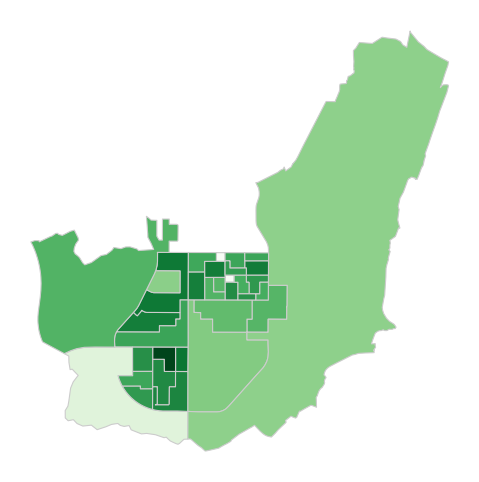

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# gdf와 trash_df를 병합합니다.
# '법정동명'을 기준으로 병합
# 원하는 변수
variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = noeun_filter_gdf[variable].min(), noeun_filter_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
noeun_filter_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/noeun_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [ ]:
import folium

# GeoDataFrame의 중심 좌표를 사용하여 초기 지도 위치 설정
center = [sangdae_gdf.geometry.centroid.y.mean(), sangdae_gdf.geometry.centroid.x.mean()]

# Folium 지도 생성
m = folium.Map(location=center, zoom_start=12)

# GeoDataFrame을 GeoJSON으로 변환하여 Folium에 추가
folium.GeoJson(sangdae_gdf.to_json(),
               name='geojson',
               style_function=lambda x: {'color': 'blue', 'weight': 1}
               ).add_to(m)

# 레이어 제어 추가
folium.LayerControl().add_to(m)

# 지도 저장 및 표시
# m.save('map.html')
m

<ipython-input-11-b2c3e78f13db>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [sangdae_gdf.geometry.centroid.y.mean(), sangdae_gdf.geometry.centroid.x.mean()]


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계
sangkwon_counts = df1['법정동명'].value_counts().reset_index()
sangkwon_counts.columns = ['법정동명', '이용금액']

# Shapefile과 집계된 상권 수 데이터 병합
merged_gdf = gdf.merge(sangkwon_counts, left_on='법정동명', right_on='법정동명')

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=merged_df.to_json(),
    data=merged_df,
    columns=['법정동명', '이용금액'],
    key_on='feature.properties.법정동명',
    fill_color='Oranges',
    fill_opacity=1,
    line_opacity=0,
    legend_name='이용금액',

).add_to(m)

# 법정동별 이름 추가 (텍스트로 표시)
for _, row in gdf.iterrows():
    # 법정동의 중심 좌표 계산 (Polygon의 centroid)
    centroid = row['geometry'].centroid
    lat, lon = centroid.y, centroid.x

    # 텍스트를 DivIcon으로 추가
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 8pt; font-weight: bold; color: black; transform: rotate(0deg); text-align: center; white-space: nowrap;">{row["법정동명"]}</div>',
        ),
        tooltip=row['법정동명']
    ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/daejeon_sangkwon_map.html')

m